In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import cv2

import pims

In [23]:
# The PIMS reader does a good job of retaining the proper information for displaying the images and 
# retaining some metadata about the experiment.

from pims import ND2Reader_SDK
frames = ND2Reader_SDK('Desktop/ImagePython/Test.nd2')
frames.iter_axes = 'mt'
frames.bundle_axes = 'yxc'

In [191]:
# Cleaning up the meta_data and storing in a dictionary
frames.default_coords
metadata = frames.metadata_text

meta = metadata.split('\r\n')

meta.remove('')
meta.remove('  ')
meta.remove('  ')

for i in range(len(meta)):
    meta[i] = meta[i].strip()

micro = meta[20]
print(micro)
meta_micro = micro.split(":  ")
meta.pop(20)
meta.insert(21, meta_micro[1].strip())
meta.pop(0)
meta.pop(-1)

meta

Microscope Settings:   Microscope: Ti Microscope


['Dimensions: T(2) x XY(7)',
 'Camera Name: DS-Fi2-U3',
 'Numerical Aperture: 0.45',
 'Refractive Index: 1',
 'Camera Settings:',
 'Format: 2560x1920 Fine',
 'Exposure: ME 1.5 ms (-+0.0 EV)',
 'AnalogGain: 1.00',
 'MeteringMode: Average',
 'NR: OFF',
 'Sharpness: Low',
 'Offset: 0.00',
 'Saturation: 0.00',
 'Hue: 0.00',
 'WhiteBalanceRed: 0.86',
 'WhiteBalanceBlue: 3.31',
 'Presets: Neutral',
 'BitDepth: 8',
 'High Quality Capture: ON',
 'Nikon Ti, FilterChanger(Turret1): 1',
 'Microscope: Ti Microscope',
 'SFCplus, FilterChanger(SFCplus 1): 4 (FITC (Em))',
 'LU-NV NIDAQ, Shutter(LU-NV): Closed',
 'X-Cite120, Shutter(EPI): Closed',
 'Nikon Ti, Illuminator(Illuminator-DIA): Remote Switch On',
 'Nikon Ti, Illuminator(Illuminator-DIA): On',
 'Nikon Ti, Illuminator(Illuminator-DIA) Voltage: 4.0',
 'LightPath: R100',
 'PFS-S, state: On',
 'PFS-S, offset: 10148',
 'PFS-S, mirror: Inserted',
 'Zoom: 1.00x',
 'LU-NV NIDAQ, MultiLaser(LU-NV NIDAQ):',
 'Line:1; ExW:405; Power: 98.0; Off',
 'Line

In [150]:
# Individual metadata can be extracted for each image in the time (t) and location (m) stack
# The indices from the dataframe can be used to display the image or convert to a numpy array.

df = pd.DataFrame()
for i in range(len(frames)):
    dict_new = frames[i].metadata
    df = df.append(dict_new, ignore_index=True)
df

,axes,c,colors,coords,m,max_value,mpp,t,t_ms,x,x_um,y,y_um,z_um
0,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 0, 't': 0}",0.0,255.0,0.473882,0.0,3.719935e+03,0.0,28362.0,0.0,-1136.0,3046.425
1,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 0, 't': 1}",0.0,255.0,0.473882,1.0,3.603331e+06,0.0,28362.0,0.0,-1136.0,3046.425
2,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 1, 't': 0}",1.0,255.0,0.473882,0.0,8.749911e+03,0.0,28362.0,0.0,-1135.9,3046.425
3,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 1, 't': 1}",1.0,255.0,0.473882,1.0,3.609031e+06,0.0,28362.0,0.0,-1135.9,3046.425
4,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 2, 't': 0}",2.0,255.0,0.473882,0.0,1.397989e+04,0.0,24439.9,0.0,-1084.9,3046.425
5,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 2, 't': 1}",2.0,255.0,0.473882,1.0,3.614531e+06,0.0,24439.9,0.0,-1084.9,3046.425
6,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 3, 't': 0}",3.0,255.0,0.473882,0.0,1.957978e+04,0.0,12926.8,0.0,-476.1,3046.425
7,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 3, 't': 1}",3.0,255.0,0.473882,1.0,3.619761e+06,0.0,12926.8,0.0,-476.1,3046.425
8,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 4, 't': 0}",4.0,255.0,0.473882,0.0,2.688966e+04,0.0,8864.8,0.0,-522.7,3046.425
9,"[y, x, c]","[0, 1, 2]","[(1.0, 1.0, 1.0)]","{'m': 4, 't': 1}",4.0,255.0,0.473882,1.0,3.625360e+06,0.0,8864.8,0.0,-522.7,3046.425


In [151]:
frames[3].metadata

{'x_um': 28362.0,
 'y_um': -1135.9,
 'z_um': 3046.425,
 't_ms': 3609030.625918746,
 'colors': [(1.0, 1.0, 1.0)],
 'mpp': 0.4738819692599676,
 'max_value': 255,
 'x': 0,
 'y': 0,
 'c': array([0, 1, 2]),
 't': 1,
 'm': 1,
 'axes': ['y', 'x', 'c'],
 'coords': {'m': 1, 't': 1}}

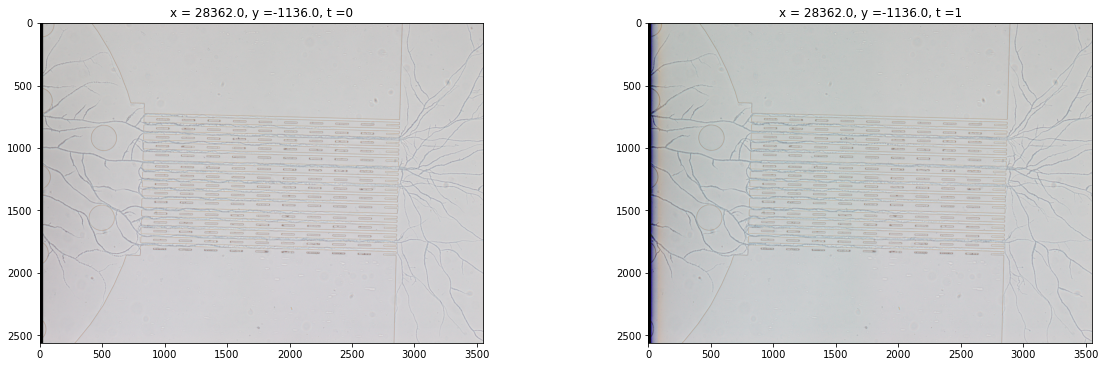

In [163]:
img_00 = np.array(frames[0])

plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
plt.title('x = '+ str(frames[0].metadata['x_um']) + ', y ='+ str(frames[0].metadata['y_um'])\
         + ', t ='+ str(frames[0].metadata['t']))
plt.imshow(frames[0])
           
plt.subplot(3,2,2)
plt.title('x = '+ str(frames[1].metadata['x_um']) + ', y ='+ str(frames[1].metadata['y_um'])\
         + ', t ='+ str(frames[1].metadata['t']))
plt.imshow(frames[1])
